In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

TARGET_COL = 'Fertilizer Name'

### target encoding for multi-class category
* N-1 new columns for the classes, with probability for that class label, given the encoded label

In [2]:
# make soil-crop interaction
data_train['sc-interaction'] = data_train['Soil Type'].str.cat(data_train['Crop Type'], sep=' ')
data_test['sc-interaction'] = data_test['Soil Type'].str.cat(data_test['Crop Type'], sep=' ')

unique_training = len(data_train['sc-interaction'].unique())
unique_test = len(data_test['sc-interaction'].unique())
print(f"unique interaction labels: training={unique_training} test={unique_test}")

unique interaction labels: training=55 test=55


In [3]:
counts_train = data_train['sc-interaction'].value_counts().rename_axis('sc-interaction').reset_index(name='train')
counts_test = data_test['sc-interaction'].value_counts().rename_axis('sc-interaction').reset_index(name='test')

counts_train['train'] /= counts_train['train'].sum()
counts_test['test'] /= counts_test['test'].sum()

# Merge the counts on the label
counts_merged = pd.merge(counts_train, counts_test, on='sc-interaction', how='outer').fillna(0)
df_long = counts_merged.melt(id_vars='sc-interaction', 
                             value_vars=['train', 'test'],
                             var_name='source', value_name='count')

<AxesSubplot:xlabel='sc-interaction', ylabel='count'>

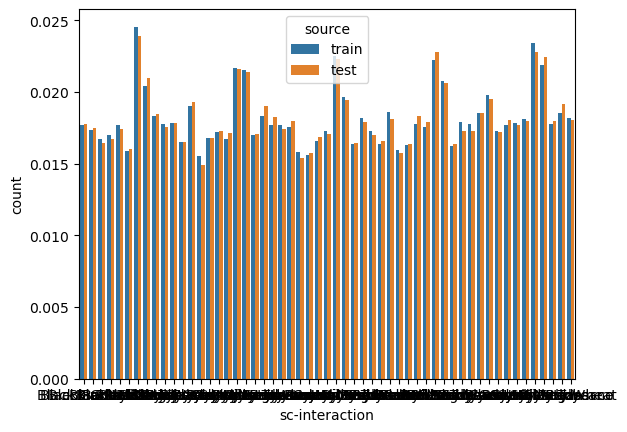

In [4]:
sns.barplot(data=df_long, x='sc-interaction', y='count', hue='source')

In [10]:
# the actual encoding
counts_df = data_train.groupby('sc-interaction')['Fertilizer Name'].value_counts().unstack(fill_value=0)
counts_df = counts_df.div(counts_df.sum(axis=1), axis=0)
counts_df

Fertilizer Name,10-26-26,14-35-14,17-17-17,20-20,28-28,DAP,Urea
sc-interaction,,,,,,,
Black Barley,0.140208,0.162671,0.152947,0.131238,0.138851,0.133499,0.140585
Black Cotton,0.152895,0.146828,0.142912,0.148825,0.127246,0.149977,0.131316
Black Ground Nuts,0.145513,0.161548,0.157878,0.151256,0.151655,0.119505,0.112645
Black Maize,0.155082,0.152339,0.143641,0.129849,0.141055,0.143798,0.134237
Black Millets,0.145119,0.165172,0.137655,0.137655,0.141802,0.141274,0.131323
Black Oil seeds,0.153736,0.170679,0.126478,0.147865,0.144091,0.128156,0.128994
Black Paddy,0.154318,0.147420,0.153232,0.130418,0.147366,0.146116,0.121130
Black Pulses,0.157286,0.171128,0.161857,0.153434,0.137503,0.121964,0.096827
Black Sugarcane,0.163664,0.154874,0.157199,0.157998,0.148990,0.115284,0.101990


In [11]:
data_train = pd.merge(data_train, counts_df, on='sc-interaction', how='left').fillna(0)
data_train.sample(5)

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,sc-interaction,10-26-26,14-35-14,17-17-17,20-20,28-28,DAP,Urea
174069,174069,26,59,28,Sandy,Maize,7,8,18,10-26-26,Sandy Maize,0.143771,0.150391,0.129401,0.133163,0.150918,0.150692,0.141664
678304,678304,36,60,62,Loamy,Oil seeds,29,9,30,17-17-17,Loamy Oil seeds,0.156305,0.157923,0.153840,0.147446,0.156228,0.115245,0.113011
222906,222906,33,70,29,Clayey,Barley,9,16,33,28-28,Clayey Barley,0.170493,0.147130,0.151576,0.152385,0.156346,0.100728,0.121342
268463,268463,34,60,29,Sandy,Millets,13,14,35,28-28,Sandy Millets,0.143178,0.140636,0.144150,0.139888,0.147589,0.134430,0.150131
613973,613973,37,59,29,Clayey,Pulses,17,0,30,17-17-17,Clayey Pulses,0.168465,0.160216,0.188252,0.158851,0.133234,0.089691,0.101290


In [ ]:
data_train.drop(columns=['Soil Type', 'Crop Type', 'sc-interaction', 'Urea'])

In [15]:
data_train[TARGET_COL].iloc[2]

'17-17-17'